In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Cleaning & Exploration

In [3]:
# Data info and the descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
list(df.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [5]:
# Checking the data dimension
df.shape

(768, 9)

In [6]:
# Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

### Viualizations

#### What is the relationship between Age and blood pressure?

Text(0.5, 1.0, 'The Age-Blood Pressure Correlation')

<Figure size 800x800 with 0 Axes>

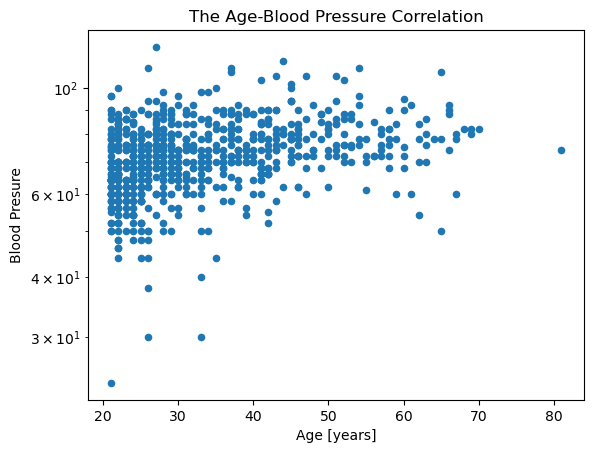

In [8]:
plt.figure(figsize=(8, 8))

df.plot(x='Age', y='BloodPressure', kind='scatter')
plt.yscale('log')
plt.xlabel('Age [years]')
plt.ylabel('Blood Presure')
plt.title('The Age-Blood Pressure Correlation')

Text(0, 0.5, 'Frequency')

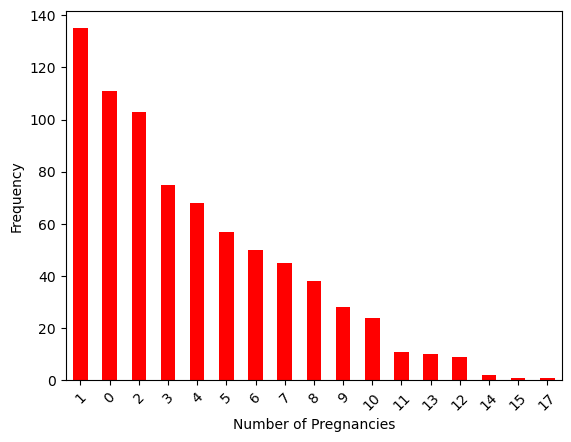

In [9]:
df.Pregnancies.value_counts().plot(kind='bar', color='red')
plt.xticks(rotation=45);
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')

In [10]:
df.Age.nunique()

52

#### What is the Age distribution?

Text(0.5, 1.0, 'The Age Distribution of the Data')

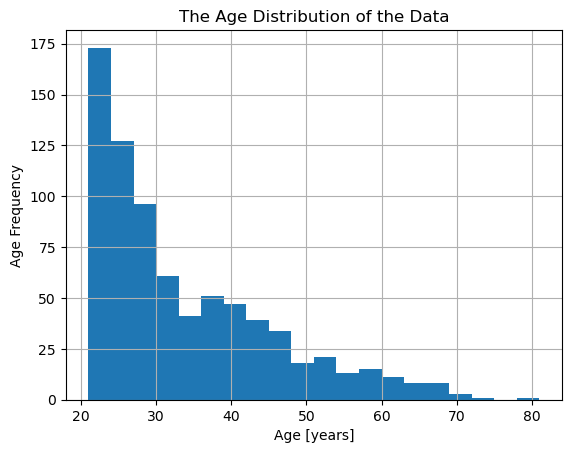

In [11]:
df['Age'].hist(bins=20)
plt.xlabel('Age [years]')
plt.ylabel('Age Frequency')
plt.title('The Age Distribution of the Data')

### Checking the correlation of the features

In [12]:
df_cor = df.corr()
df_cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


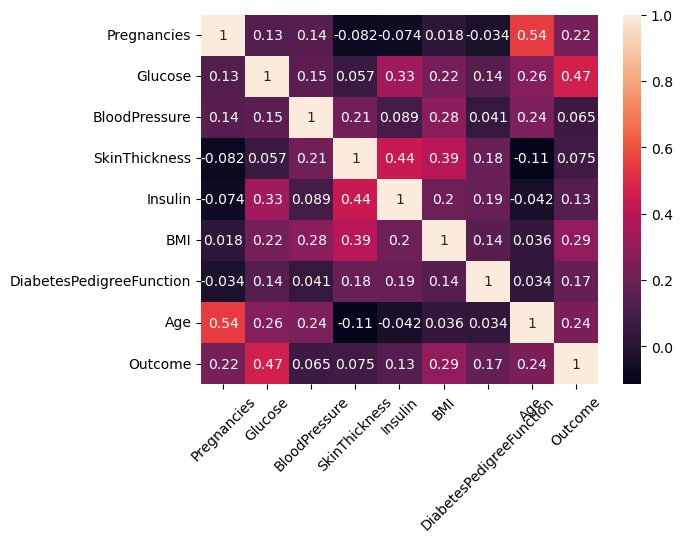

In [13]:
# Visualizing the correlations

import seaborn as sns

sns.heatmap(df_cor, annot=True)
plt.xticks(rotation=45);

- No feature is correlated
- This suggests that all the features can be used for the model training

### Modeling Phase

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Splitting the data to train and test sets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)


In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

### Performing Feature Scaling on the training set

In [19]:
# Importing standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-1.1516552 , -0.10151228, -0.27092232, ..., -3.92917438,
         3.79938705, -1.04342946],
       [-0.26690721, -0.19522934, -0.16430064, ...,  0.76180187,
        -0.98154094, -0.43702078],
       [ 0.61784077, -0.22646836, -3.68281619, ..., -3.92917438,
        -0.86360533, -0.61028041],
       ...,
       [ 0.02800878, -0.22646836, -0.27092232, ..., -0.3709273 ,
        -1.05411669, -0.78354003],
       [-0.85673921, -1.31983412,  0.58205115, ..., -0.80185688,
         0.32784668, -0.95679965],
       [ 0.91275677,  1.46043881,  1.00853788, ...,  0.77411414,
         0.94474061,  0.60253696]])

In [20]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[-0.81787509,  2.16777959, -0.44381393, ..., -0.28550393,
        -0.2035479 ,  2.07182818],
       [-0.21330182,  1.75894695,  0.81589612, ...,  0.15408054,
         2.07348692,  1.49866374],
       [ 1.29813134, -0.00217826,  0.81589612, ..., -0.51903318,
        -0.62220906, -0.9577553 ],
       ...,
       [ 1.60041797, -1.98344413,  0.5251938 , ...,  0.08539547,
        -1.11315705,  0.59797676],
       [ 0.99584471, -0.56825423,  0.23449148, ...,  0.68982412,
        -0.78786636,  0.92549929],
       [-0.81787509, -0.78839488,  0.62209457, ...,  0.38760979,
        -0.70051978,  0.76173802]])

### This is a classification problem, so we choose a classification algorithm

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV

In [22]:
# Define a dictionary with estimators and their parameter grids
estimators = {
    'LogisticRegression': {
        'estimator': LogisticRegression(),
        'param_grid': {
            'penalty': ['l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
            'max_iter': [100, 300, 500],
            'class_weight': [None, 'balanced']
        }
    },
    'RandomForestClassifier': {
        'estimator': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'SVC': {
        'estimator': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10]
        }
    }
}

# Iterate over estimators and perform GridSearchCV
for estimator_name, estimator_data in estimators.items():
    print(f"Grid search for {estimator_name}")
    
    model = estimator_data['estimator']
    param_grid = estimator_data['param_grid']
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    accuracy = best_model.score(X_test_scaled, y_test)
    print(f"Best Hyperparameters: {best_params}")
    print(f"Test Accuracy with Best Model: {accuracy:.4f}")
    print("-" * 40)

Grid search for LogisticRegression
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Test Accuracy with Best Model: 0.7403
----------------------------------------
Grid search for RandomForestClassifier
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy with Best Model: 0.7619
----------------------------------------
Grid search for SVC
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Hyperparameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Test Accuracy with Best Model: 0.7532
----------------------------------------


- The best model is the Support Vector Classifier

In [30]:
model = SVC(C=10, gamma=0.001, kernel='rbf')
model.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001)

### Model Evaluation

#### Accuracy Score

In [31]:
# Accuracy Score on the training data
X_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print(f"The accuracy score of the training data is: {training_data_accuracy*100:.4f}%")

The accuracy score of the training data is: 79.5158%


In [32]:
# The accuracy score on the testing data
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the SVC model is: {accuracy*100:.4f}%")

The accuracy of the SVC model is: 75.3247%


In [33]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### Making Predictive System

In [34]:
input_data = (4, 112, 67, 28, 0, 15.6, 0.4, 19)
input_data_array = np.array(input_data)

# Reshape the array since we are predicting for one instance
input_data_array = input_data_array.reshape(1, -1)

prediction = model.predict(input_data_array)
print(prediction)

if prediction == 1:
    print('The patient has diabetes, please administer the treatment')
else:
    print('The patient has no diabetes, good to go!')

[1]
The patient has diabetes, please administer the treatment


### Saving the model

In [35]:
import pickle

filename= 'diabetes_saved_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model, file)
    
print(f"Model saved as {filename}")

Model saved as diabetes_saved_model.pkl


### Loading the saved model

In [38]:
with open('diabetes_saved_model.pkl', 'rb') as model_file:
    loaded_file = pickle.load(model_file)

In [40]:
prediction = loaded_file.predict(input_data_array)
print(prediction)

[1]
